In [12]:
install.packages("EnvStats")
library(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘nortest’



Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm




In [21]:
install.packages("nortest")
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [87]:
install.packages("correlation")
library(correlation)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’, ‘parameters’




# Task 1

## Test, that function in R works correctly

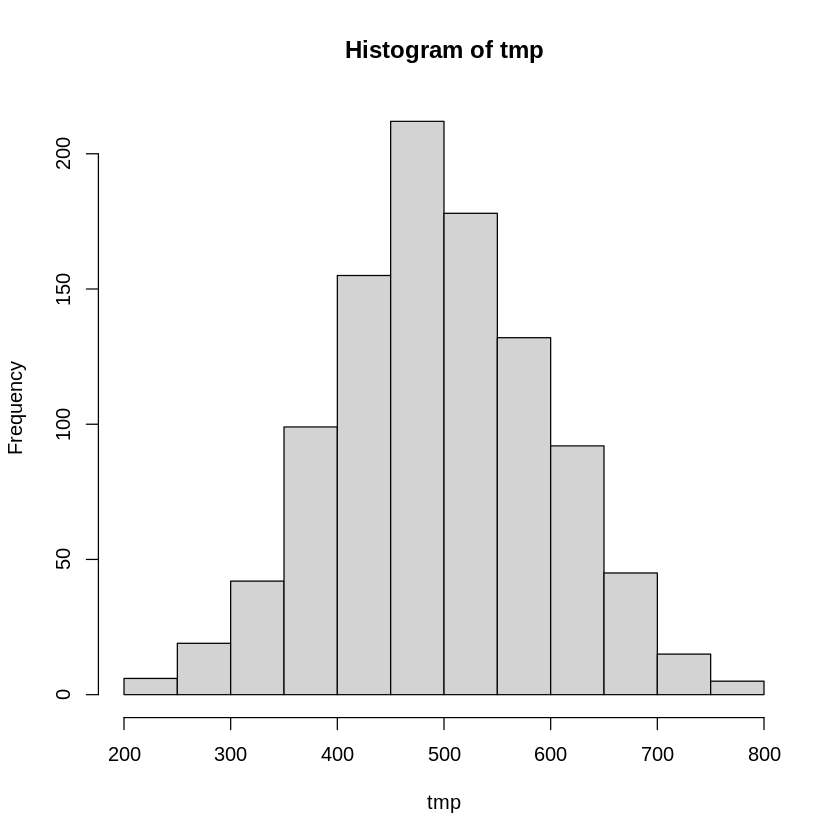

In [47]:
# generate normal distribution
tmp = round(rnorm(1000, 5, 1)*100)
hist(tmp)

In [49]:
# p-value tells us that it is not uniform distribution (i.e. we should reject null hypothesis)
chisq.test(x=tmp)


	Chi-squared test for given probabilities

data:  tmp
X-squared = 19705, df = 999, p-value < 2.2e-16


In [51]:
# it is obviously uniform distribution, thus p-value equals 1 (we can't reject null hypothesis)
chisq.test(x=c(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10))


	Chi-squared test for given probabilities

data:  c(10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,     10, 10, 10)
X-squared = 0, df = 17, p-value = 1


## Actual task

In [52]:
# data
data = c(7, 12, 10, 17, 10, 13, 15)

In [38]:
# check mean > 5
mean(data)

[1] 12

In [53]:
# calculation statistics by hand
sum((data - mean(data))^2 / mean(data))

[1] 5.666667

In [55]:
# final answer
chisq.test(x=data)


	Chi-squared test for given probabilities

data:  data
X-squared = 5.6667, df = 6, p-value = 0.4615


# Task 2

In [14]:
# define starting parameters
n = 1000 # num items
p.value = 0 # initial p-value
p = 0.25 # correlation according to the task


while (p.value < 0.05){
    t_score = p * sqrt((n-2)/(1-p^2)) # calculate statistic
    p.value = pt(q=t_score, df=n-2, lower.tail=F) # compute p-value
    print(paste(t_score, n, p.value))
    n = n - 1
}

[1] "8.15679675689749 1000 5.13660228511415e-16"
[1] "8.15270916117254 999 5.30764422520783e-16"
[1] "8.14861951498535 998 5.48438423871528e-16"
[1] "8.14452781524708 997 5.66701224270943e-16"
[1] "8.14043405886115 996 5.85572448746485e-16"
[1] "8.1363382427232 995 6.05072376776824e-16"
[1] "8.13224036372102 994 6.25221964128249e-16"
[1] "8.12814041873457 993 6.46042865420192e-16"
[1] "8.12403840463596 992 6.6755745744404e-16"
[1] "8.11993431828936 991 6.89788863260546e-16"
[1] "8.11582815655104 990 7.1276097710176e-16"
[1] "8.1117199162693 989 7.36498490104392e-16"
[1] "8.10760959428445 988 7.61026916902445e-16"
[1] "8.10349718742881 987 7.8637262310764e-16"
[1] "8.09938269252663 986 8.12562853707575e-16"
[1] "8.09526610639412 985 8.39625762411922e-16"
[1] "8.09114742583935 984 8.67590441978832e-16"
[1] "8.08702664766229 983 8.96486955553663e-16"
[1] "8.08290376865476 982 9.26346369054469e-16"
[1] "8.07877878560037 981 9.57200784638884e-16"
[1] "8.07465169527454 980 9.89083375288472e-

# Task 3

In [15]:
total.length = 29903
p.t = 9594 / total.length
p.a = 8954 / total.length
p.g = 5863 / total.length
p.c = 5492 / total.length

In [16]:
p.ta = p.t * p.a / 2

In [17]:
ta_expected = total.length * p.ta
ta_expected

[1] 1436.389

In [24]:
poisson.test(x=2377, T=1, r=1436) # x in num of expected observations (or real), while r is num of real observations (or expected) (T is just a denominatof for x, namely poisson.test(x=2*1436, T=2*1, r=2377) gives the same result)


	Exact Poisson test

data:  2377 time base: 1
number of events = 2377, time base = 1, p-value < 2.2e-16
alternative hypothesis: true event rate is not equal to 1436
95 percent confidence interval:
 2282.394 2474.521
sample estimates:
event rate 
      2377 


In [25]:
# same results
poisson.test(x=1436, T=1, r=2377)


	Exact Poisson test

data:  1436 time base: 1
number of events = 1436, time base = 1, p-value < 2.2e-16
alternative hypothesis: true event rate is not equal to 2377
95 percent confidence interval:
 1362.68 1512.24
sample estimates:
event rate 
      1436 


In [22]:
poisson.test(x=2*1436, T=2*1, r=2377) # testing T, same results


	Exact Poisson test

data:  2 * 1436 time base: 2 * 1
number of events = 2872, time base = 2, p-value < 2.2e-16
alternative hypothesis: true event rate is not equal to 2377
95 percent confidence interval:
 1383.957 1489.499
sample estimates:
event rate 
      1436 


In [29]:
# here I show that binomial test gives the same as poisson
binom.test(x=2377, n=29903-1, p=1436/(29903-1)) # minus 1 because TA has legth 2


	Exact binomial test

data:  2377 and 29903 - 1
number of successes = 2377, number of trials = 29902, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.04802354
95 percent confidence interval:
 0.07645122 0.08261679
sample estimates:
probability of success 
            0.07949301 


In [30]:
1436/(29903-1)

[1] 0.04802354

# Task 4

In [94]:
data.from_file = c(62.2, 58.7, 59.7, 58.7, 60.0, 62.0, 61.5, 58.2, 61.9, 59.1, 61.3, 60.0, 61.7, 59.6, 61.3, 61.8, 64.3, 62.0, 61.8)

In [95]:
mean(data.from_file)

[1] 60.83158

In [96]:
wilcox.test(data.from_file, mu=61.5, correct=F, exact=F, alternative='t')


	Wilcoxon signed rank test

data:  data.from_file
V = 57, p-value = 0.2139
alternative hypothesis: true location is not equal to 61.5


In [83]:
binom.test(x=sum(data.from_file > 61.5), n=sum(data.from_file != 61.5), p=0.5, alternative='t')


	Exact binomial test

data:  sum(data.from_file > 61.5) and sum(data.from_file != 61.5)
number of successes = 8, number of trials = 18, p-value = 0.8145
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.2153015 0.6924283
sample estimates:
probability of success 
             0.4444444 


# Task 5

In [110]:
manufacture1 = c(2.49, 1.01, 2.81, 2.60, 3.09, 4.60, 2.50, 1.18, 2.20, 3.12, 2.90, 3.58, 2.89, 4.48, 2.17, 1.26, 2.63, 1.17, 1.72, 1.71, 2.45, 3.75, 3.31, 3.23 )
manufacture2 = c(3.37, 2.12, 3.08, 3.57, 4.79, 1.60, 3.71, 5.48, 3.06, 5.76, 3.86, 4.43, 3.77, 4.59, 2.80, 4.11, 3.70, 2.36, 4.83, 2.33)

In [111]:
var.test(manufacture1, manufacture2)


	F test to compare two variances

data:  manufacture1 and manufacture2
F = 0.75962, num df = 23, denom df = 19, p-value = 0.5252
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3081884 1.8036903
sample estimates:
ratio of variances 
         0.7596193 


In [113]:
# seems like fisher test gave right result
print(sd(manufacture1))
print(sd(manufacture2))

[1] 0.9731272
[1] 1.116533


In [112]:
kruskal.test(list(manufacture1, manufacture2))


	Kruskal-Wallis rank sum test

data:  list(manufacture1, manufacture2)
Kruskal-Wallis chi-squared = 8, df = 1, p-value = 0.004678


In [117]:
t.test(manufacture1, manufacture2, var.equal=T)


	Two Sample t-test

data:  manufacture1 and manufacture2
t = -3.3245, df = 42, p-value = 0.001845
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.6829713 -0.4115287
sample estimates:
mean of x mean of y 
  2.61875   3.66600 


In [116]:
print(mean(manufacture1))
print(mean(manufacture2))

[1] 2.61875
[1] 3.666
